In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier #random forest için
from sklearn.neighbors import KNeighborsClassifier #knn için
from sklearn.svm import SVC #svm için
import os

In [2]:
df=pd.read_csv('diabetes_data.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc=StandardScaler()

In [9]:
sc.fit(df.drop('Outcome',axis=1)) 
#outcome sütunundaki 1 değerlerini dropluyoruz

StandardScaler()

In [10]:
scaled=sc.transform(df.drop('Outcome',axis=1))

In [11]:
final=pd.DataFrame(scaled,columns=df.columns[:-1])

In [12]:
final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(final,df['Outcome'], test_size=0.33, random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn=KNeighborsClassifier()

In [17]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [18]:
pred=knn.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[146  21]
 [ 39  48]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.70      0.55      0.62        87

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.76      0.76      0.76       254



In [21]:
error=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))
    

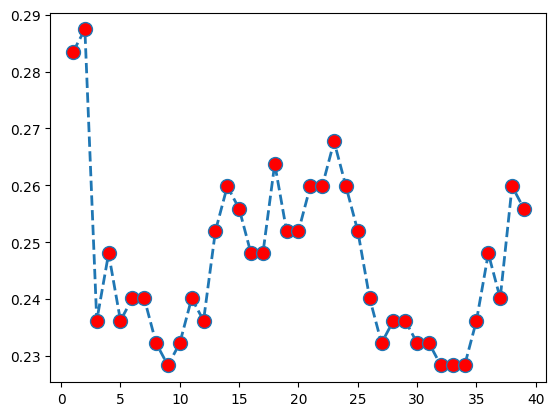

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),error,marker='o',markerfacecolor='red',markersize=10,lw=2,ls='--')

In [ ]:
random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(x_train, y_train)
pred=random_forest.predict(x_test)
print(confusion_matrix(y_test,pred))
print("Random Forest Sınıflandırma Raporu: \n",classification_report(y_test, pred))

In [ ]:
scv = SVC()
scv.fit(x_train,y_train)
pred=scv.predict(x_test)
print(confusion_matrix(y_test,pred))
print("SVM Sınıflandırma Raporu: \n",classification_report(y_test, pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print("KNN Sınıflandırma Raporu: \n",classification_report(y_test, pred))